## 一、 实验准备
### 1.1 实验概述
我们本次实验将会使用Keras搭建卷积神经网络，来对11659张蔬菜图片进行训练分类，共包含22个类别。本次实验我们来学习一下如何可视化训练过程中精度值、损失值的变化，从而更好的分析和优化我们的模型。我们还是先来熟悉一下我们需要用到的数据集以及神经网络基础。

#### 蔬菜数据集：
  
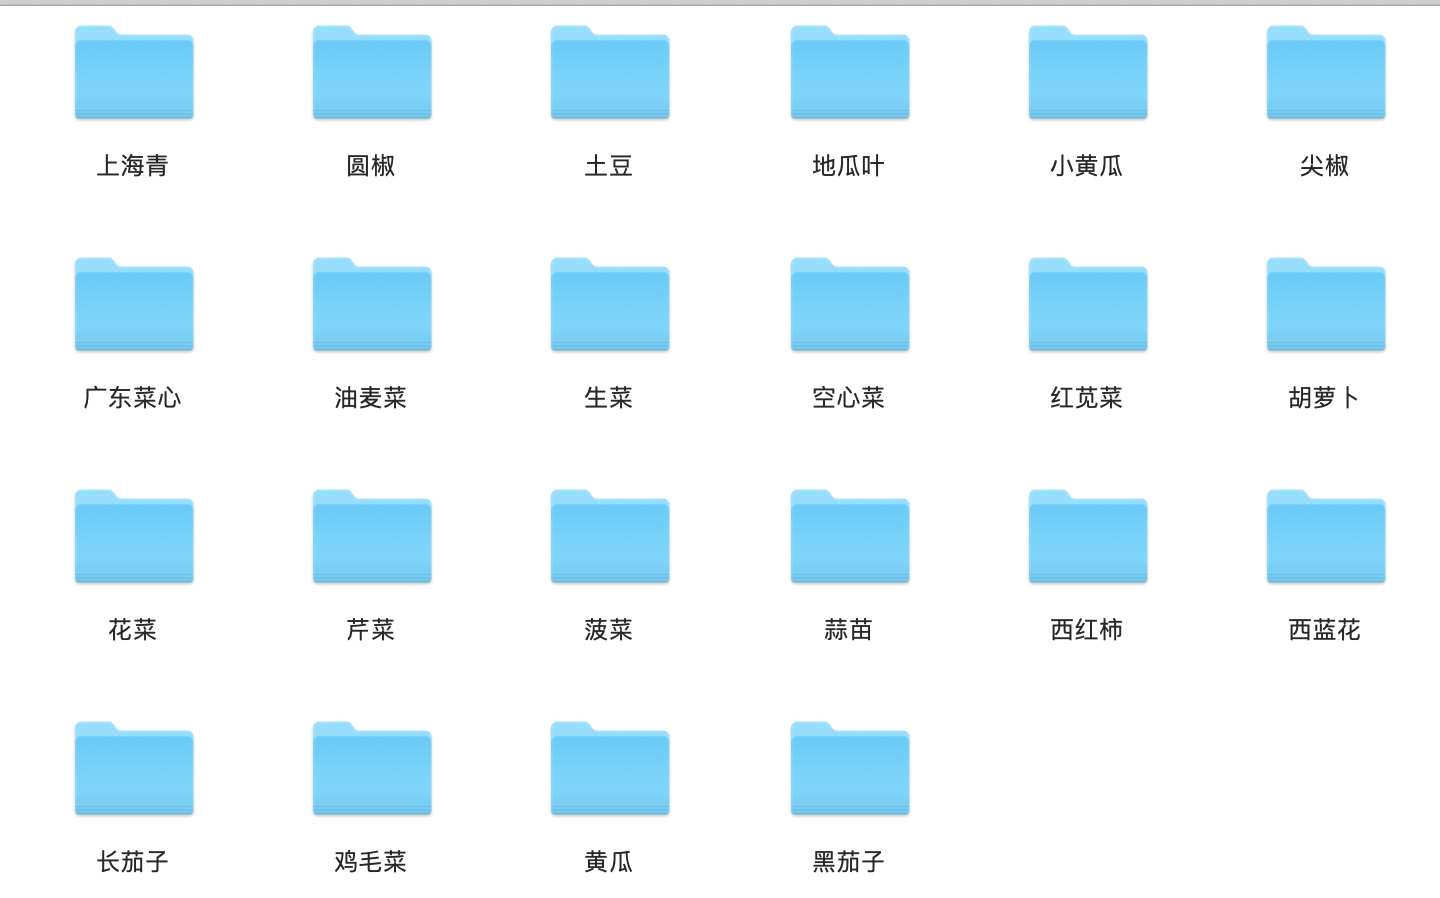   



#### 全连接神经网络：
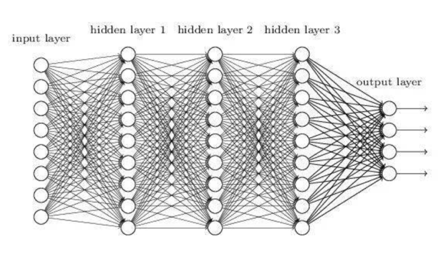
最左边的层叫做输入层（input layer）在本次实验中输入层对应了28*28个输入单元，最右边的层叫做输出层（output layer）在本次实验中对应了10个类别的输出，分别对应的是当前图片对0~9中10个数字的预测概率，，输入层与输出层之间的所有层叫做隐藏层。如果隐藏层层数较少就是SNN(shallow nerual network) “浅层神经网络”;如果层数比较多，就是DNN(Deep Neural Networks) “深度神经网络”。
隐藏层中的的每一个节点称为一个神经元（nerve cell），每个神经元都是由上一层中的各个单元经过分别对应权重和偏好计算，再经过激活函数运算得来。在逻辑回归中我们用的是sigmoid激活函数，激活函数的作用就是将线性结果转换为非线性结果。我们在作为分类的神经网络中常用的激活函数有ReLU和softmax，ReLu函数把所有的负值都变为0，而正值不变，这样可以极大的避免梯度爆炸和梯度消失问题。SoftMax用于多分类问题，而sigmoid一般用于二分类问题，关于激活函数的实验，我们在后续会有更详细的探讨，这里不再过多赘述。
神经网络是利用反向传播（Back propagation）机制来更正误差，更新各个神经元之间的权重值和偏好值。


#### 卷积神经网络：
 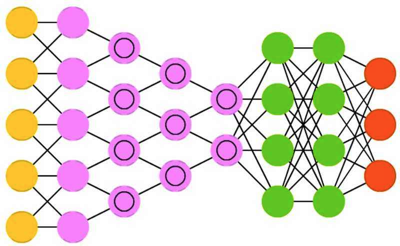  

在卷积神经网络里除了黄色部分的输入层、红色部分的输出层以外，其余都为隐藏层。神经网络是利用反向传播（Back propagation）机制来更正误差，在全连接层中更新各个神经元之间的权重值和偏好值，在卷积层中更新卷积核和偏好值。其中卷积层是用来提取图像中的特征，全连接层是为了将这些特征进行分类。


#### 卷积核
 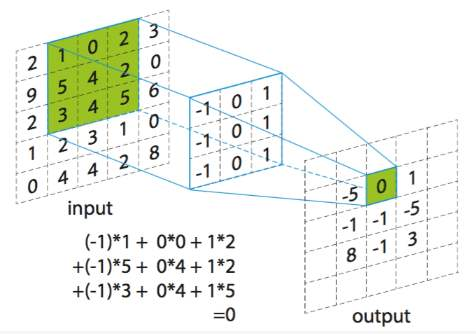  
如上图所示，流程为：最左侧为当前层的数据，我们这里简称为输入层数据，大小为5x5，经过和中间的3x3矩阵的点积得到最右侧3x3矩阵中的一个值，最右侧3x3的矩阵我们简称为当前卷积神经网络的数据，也就是feature map。其中中间层3x3的矩阵就是俗称的卷积核ConvolutionKernel。在输入层数据上通过指定的步长来依次移动卷积核并对应进行卷积操作，生成当前层的数据，只是我们这个例子了只进行了点积操作，没有进行加减偏好，偏好为常数。

卷积核的数据最开始通过初始化得到的，并不断优化更新其值，让模型的最后结果朝着我们想要的方向发展。


#### 池化层
池化（Pooling）是卷积神经网络中另一个重要的概念，它实际上是一种形式的降采样。有多种不同形式的非线性池化函数，而其中“最大池化（Max Pooling）”是最为常见的，另外还有平均池化（Average Pooling）。它是将输入的图像划分为若干个矩形区域，对每个子区域输出最大值。直觉上，这种机制能够有效地原因在于，在发现一个特征之后，它的精确位置远不及它和其他特征的相对位置的关系重要。池化层会不断地减小数据的空间大小，因此参数的数量和计算量也会下降，这在一定程度上也控制了过拟合。通常来说，CNN的卷积层之间都会周期性地插入池化层。

池化层通常会分别作用于每个输入的特征并减小其大小。当前最常用形式的池化层是每隔2个元素从图像划分出2*2的区块，然后对每个区块中的4个数取最大值。这将会减少75%的数据量。
  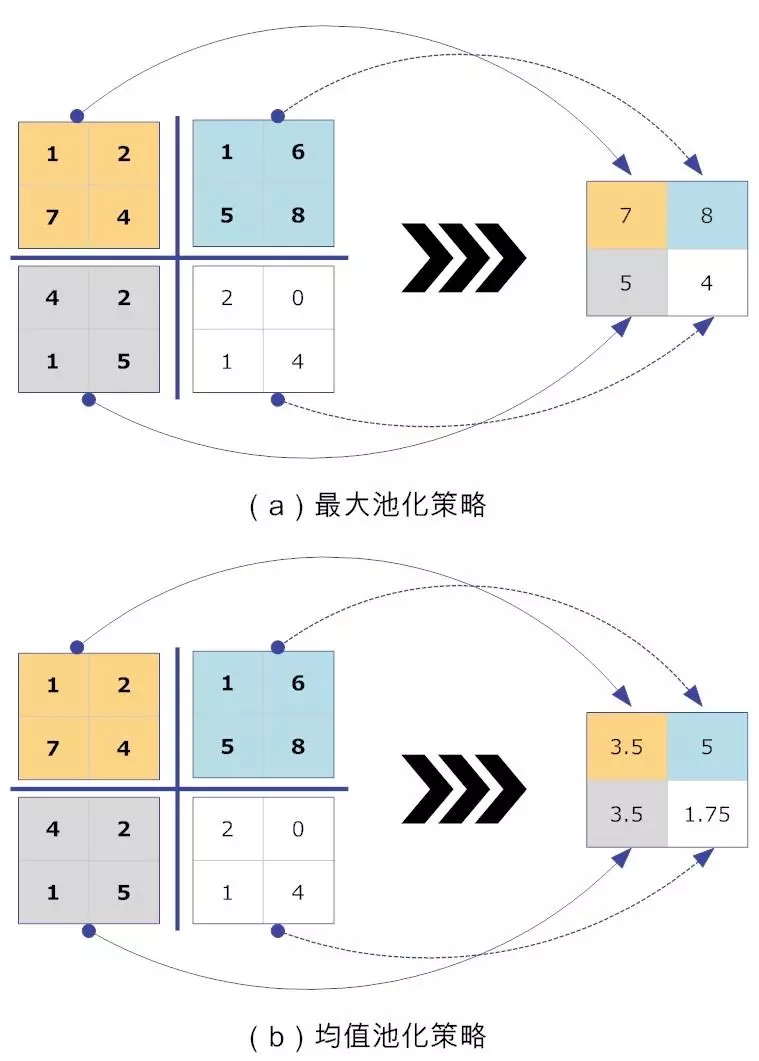  

池化的作用：池化操作后的结果相比其输入缩小了。池化层的引入是仿照人的视觉系统对视觉输入对象进行降维和抽象。在卷积神经网络过去的工作中，研究者普遍认为池化层有如下三个功效：
　1.特征不变形：池化操作是模型更加关注是否存在某些特征而不是特征具体的位置。  
　2.特征降维：池化相当于在空间范围内做了维度约减，从而使模型可以抽取更加广范围的特征。同时减小了下一层的输入大小，进而减少计算量和参数个数。  
　3.在一定程度上防止过拟合，更方便优化。

#### dropout 正则化
dropout 是神经网络最有效也最常用的正则化方法之一，它是由多伦多大学的 Geoffrey Hinton 和他的学生开发的。对某一层使用 dropout，就是在训练过程中随机将该层的一些输出特征舍 弃(设置为 0)。假设在训练过程中，某一层对给定输入样本的返回值应该是向量 [0.2, 0.5, 1.3, 0.8, 1.1]。使用 dropout 后，这个向量会有几个随机的元素变成 0，比如 [0, 0.5, 1.3, 0, 1.1]。dropout 比率(dropout rate)是被设为 0 的特征所占的比例，通常在 0.2~0.5 范围内。测试时没有单元被舍弃，而该层的输出值需要按 dropout 比率缩小，因为这时比训练时 有更多的单元被激活，需要加以平衡。  
假设有一个包含某层输出的 Numpy 矩阵layer_output，其形状为(batch_size, features)。训练时，我们随机将矩阵中一部分值设为 0。  
layer_output = layer_output * np.random.randint(0, high=2, size=layer_output.shape) #训练时，舍弃50%的输出单元  
测试时，我们将输出按 dropout 比率缩小。这里我们乘以 0.5(因为前面舍弃了一半的单元)。  
layer_output = layer_output * 0.5 #测试时
注意，为了实现这一过程，还可以让两个运算都在训练时进行，而测试时输出保持不变。 这通常也是实践中的实现方式。  
layer_output *= np.random.randint(0, high=2, size=layer_output.shape) #训练时  
layer_output /= 0.5 #注意，是成比例放大而不是成比例缩小    

 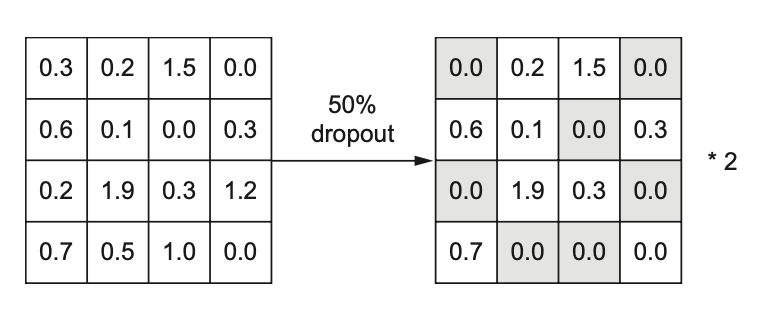   
 
$$训练时对激活矩阵使用 dropout，并在训练时成比例增大。测试时激活矩阵保持不变$$

也就是说假如dropout为0.5，需要在测试时乘以0.5，因为如果我们不这么做的话会得到一个相对于训练环节的输出期望值来说大很多的值（因为训练环节是随机0.5舍弃了神经元 参考图片），分布也会变，所以通过乘以0.5来补偿这个巨大的偏差。当然我们也可以在训练时乘以2倍，这样就不需要在测试时来乘以0.5来使得两个环节匹配。

### 1.2 实验目的
* 了解当前数据集，用于对此数据集进行训练
* 掌握数据预处理方法，使训练数据集可以放进神经网络进行训练
* 掌握使用Sequential创建神经网络模型
* 掌握如何指定损失函数、优化器、监控指标
* 以验证集上的损失值或者精度值来自动保存当前最优训练过程中的结果

### 1.3 实验准备
服务器端：python3.6以上、Numpy、Matplotlib、TensorFlow、Keras、Jupyter Notebook
客户端：Google Chrome浏览器


## 二、 实验步骤
### 2.1 数据预处理
现在的数据以JPEG文件的形式保存在硬盘中，所以数据预处理步骤大致如下：

(1) 读取图像文件。  
(2) 将 JPEG 文件解码为 RGB 像素网格。  
(3) 将这些像素网格转换为浮点数张量。  
(4) 将像素值(0~255 范围内)缩放到 [0, 1] 区间(正如你所知，神经网络喜欢处理较小的输入值)。  
这些步骤可能看起来有点复杂，但幸运的是，Keras 拥有自动完成这些步骤的工具。Keras有一个图像处理辅助工具的模块，位于keras.preprocessing.image。其中包含一个ImageDataGenerator类，可以快速创建Python生成器，能够将硬盘上的图像文件自动转换为预处理好的张量批量。
```
from keras.preprocessing.image import ImageDataGenerator

train_dir = './vegetables_22'

train_datagen = ImageDataGenerator(
    rescale=1./255, #将所有图像乘以 1/255 缩放
    validation_split=0.2)    #

train_generator = train_datagen.flow_from_directory(
        train_dir, #目标目录
        target_size=(150,150,),  #将所有图像的大小调整为 150×150
        batch_size=26,
        class_mode='categorical', 
    subset='training')  #

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150,150,), #将所有图像的大小调整为 150×150
    batch_size=25,
    class_mode='categorical', 
    subset='validation') # set as validation data
```

In [10]:
#请在这列写代码


from keras.preprocessing.image import ImageDataGenerator

train_dir = './vegetables_22'
n_batch_size = 40

train_datagen = ImageDataGenerator(
    rescale=1./255, #将所有图像乘以 1/255 缩放
    validation_split=0.2)    #

train_generator = train_datagen.flow_from_directory(
        train_dir, #目标目录
        target_size=(150,150,),  #将所有图像的大小调整为 150×150
        batch_size=n_batch_size,
        class_mode='categorical', 
    subset='training')  #

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150,150,), #将所有图像的大小调整为 150×150
    batch_size=n_batch_size,
    class_mode='categorical', 
    subset='validation') # set as validation data

# print(9334//n_batch_size)
# print(len(train_generator))

# print(train_generator)

# for n,x in enumerate(train_generator) :
    
#     print(n,x[0].shape[0])

Found 9334 images belonging to 22 classes.
Found 2325 images belonging to 22 classes.


### 2.2 生成器内容查看
我们来看一下训练数据集生成器train_generator的输出
```python
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
```
它生成了150×150的RGB图像[形状为 ( * , 150, 150, 3)]与二进制标签[形状为 ( * ,)]组成的批量。每个批量中包含*个样本(批量大小)。注意，生成器会不停地生成这些批量，它会不断循环目标文件夹中的图像。由于我们只是查看数据，所以我们这里使用(break)迭代循环。   

In [19]:
#请在这列写代码







### 2.3 查看对应的标签类别
我们没有手动指定类别标签，Keras会自动将文件夹下的每个子文件夹最为一个类别划分，如下代码可以查看类别对应的编号的字典内容。往往需要将字典的Key和Value互换，这样方便使用编号快速查看对一个的类别名称。

```python
classes = train_generator_increase.class_indices
print(classes)

classes =  {v: k for k, v in classes.items()}
print("***")
print(classes)
```  

{'上海青': 0, '圆椒': 1, '土豆': 2, '地瓜叶': 3, '小黄瓜': 4, '尖椒': 5, '广东菜心': 6, '油麦菜': 7, '生菜': 8, '空心菜': 9, '红苋菜': 10, '胡萝卜': 11, '花菜': 12, '芹菜': 13, '菠菜': 14, '蒜苗': 15, '西红柿': 16, '西蓝花': 17, '长茄子': 18, '鸡毛菜': 19, '黄瓜': 20, '黑茄子': 21}
***
{0: '上海青', 1: '圆椒', 2: '土豆', 3: '地瓜叶', 4: '小黄瓜', 5: '尖椒', 6: '广东菜心', 7: '油麦菜', 8: '生菜', 9: '空心菜', 10: '红苋菜', 11: '胡萝卜', 12: '花菜', 13: '芹菜', 14: '菠菜', 15: '蒜苗', 16: '西红柿', 17: '西蓝花', 18: '长茄子', 19: '鸡毛菜', 20: '黄瓜', 21: '黑茄子'}

In [20]:
#请在这列写代码







### 2.4 搭建卷积神经网络
我们在进行数据读取与预处理前，先来构建下卷积神经网络。  
卷积神经网络接收形状为 (image_height, image_width, image_channels) 的输入张量(不包括批量维度)。本例中设置卷积神经网络处理大小为 (150, 150, 3) 的输入张量， 再接下来做数据预处理时也会将图像调整到150*150的大小，并且保留彩色图像。 
```python
from keras import layers,models,regularizers

model = models.Sequential()
model.add(layers.Conv2D(512, kernel_size=[5, 5], activation='relu',padding="same",strides=(1, 1),
                        kernel_regularizer=regularizers.l2(0.01),input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2, padding='same'))
model.add(layers.Conv2D(512, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(256, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2),strides=2, padding='same'))
model.add(layers.Conv2D(128, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))
```

layers.Conv2D函数在创建第一层卷积层时接收了4个参数，第一个参数：32，说明当前卷积层需要有32个卷积核，对应当前卷积层也就是有32个神经元。第二个参数kernel_size：(3,3)是卷积核的大小，说明当前层的卷积核为3x3的矩阵。第三个参数：activation='relu'指定输入数据经过和卷积核进行卷积运算，再加上偏好之后进行的非线性函数的转换，我们这里用的是ReLu函数，RuLu函数可以有效避免梯度爆炸和梯度消失的问题，有关激活函数的详细研究我们会在后续实验展开。第四个参数：input_shape=(150, 150, 3)，表示输入层的形状大小为150x150x3。   

strides=(1, 1)表示卷积核在输入层数据上的移动的步长，可以根据实际情况调整，比如：(1,1)、(2,2)、(2,1)等。  
padding='same' 表示考虑输入层数据的边缘部分。如果步长为(1,1)时，输入层数据的形状大小与计算得到的当前层数据的形状大小。如果步长为其他，会根据输入层数据维度整除步长值得到相应当前层的形状大小，请自行实验，并通过model.summary()查看结果。  

在第一层卷积层之后增加了一层layers.MaxPooling2D最大池化层，参数pool_size=(2, 2)表示在多大范围内选择最大值进行保留，用来降低模型过拟合。后面的层依次使用add添加Convolution卷积层、MaxPooling2D最大池化层即可。    

Convolution卷积层之后是无法直接连接Dense全连接层的，需要把Convolution层的数据压平（Flatten），然后就可以直接加Dense层了。也就是把 (height,width,channel)的数据压缩成长度为 height × width × channel 的一维数组，然后再与FC（全连接）层连接。我们将进行 22 类别分类，最后一层使用带 22 个输出的 softmax 激活。


In [11]:
#请在这列写代码


from keras import layers,models,regularizers

model = models.Sequential()
model.add(layers.Conv2D(512, kernel_size=[5, 5], activation='relu',padding="same",strides=(1, 1),
                        kernel_regularizer=regularizers.l2(0.01),input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2, padding='same'))
model.add(layers.Conv2D(512, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(256, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2),strides=2, padding='same'))
model.add(layers.Conv2D(128, kernel_size=[3, 3], activation='relu',padding="same",strides=(1, 1),
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### 2.6 查看网络结构

```python
model.summary()
```
显示结果如下：
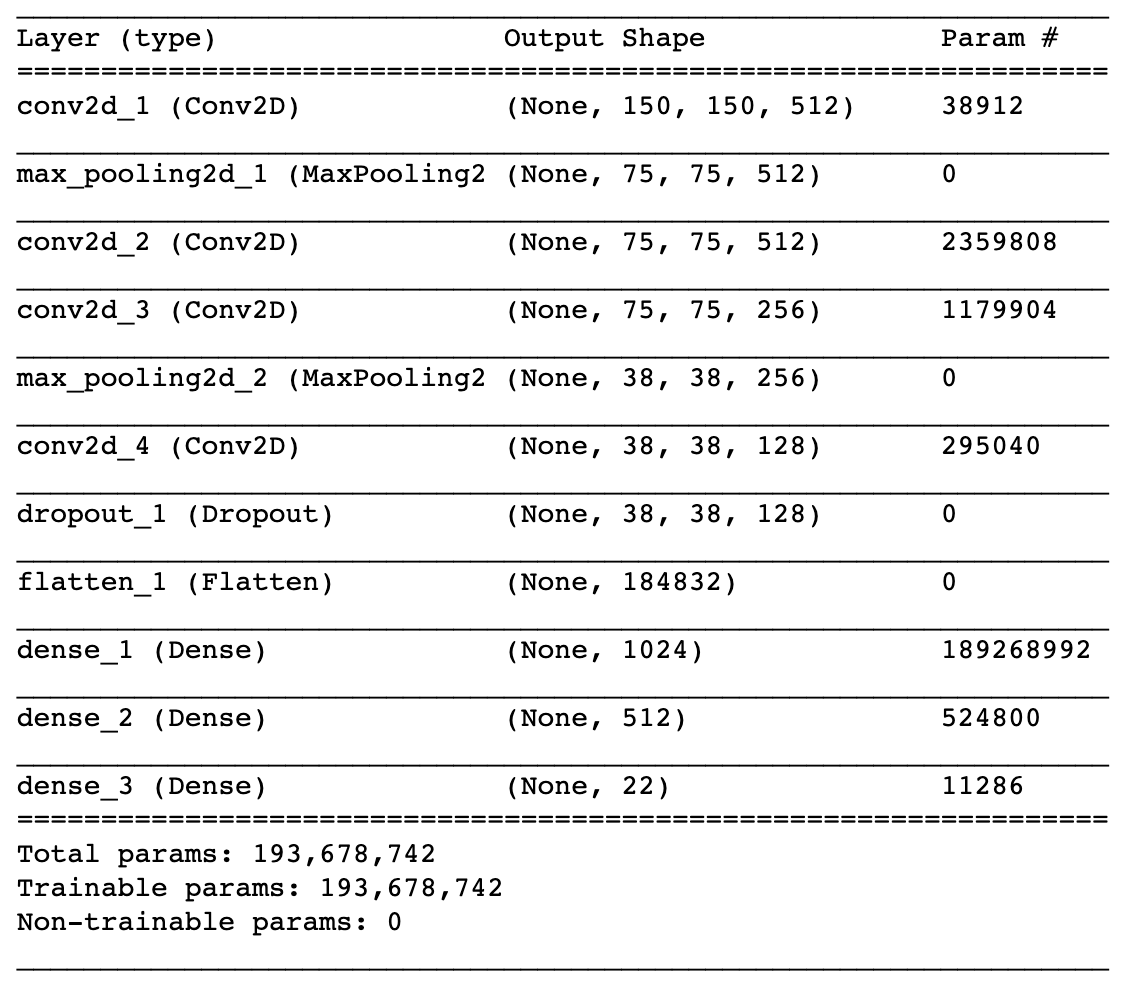  


In [22]:
#请在这列写代码







### 2.7 训练模型查看训练结果

设置检查点，以验证集上的损失值为标准保存当前最优参数模型,monitor参数可以看出我监控的值是val_loss验证损失值，只要检测到当前的验证损失值要优于之前的值就会讲模型保存成名字为vegetables_self.hdf5的文件，以便后续模型加载使用。verbose=1表示我们可以看到中间训练结果，save_best_only=True表示我们只要监控的值优于之前的值就会保存。save_weights_only=False表示我们要保存的结果不仅仅包含神经网络的参数信息，还包括网络的架构信息。
```python
from keras import optimizers
from keras.callbacks import ModelCheckpoint  

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

checkpointer = ModelCheckpoint(filepath='vegetables_self.hdf5', verbose=1,save_weights_only=False, 
                               save_best_only=True)

history = model.fit_generator( train_generator,steps_per_epoch=359,epochs=30, 
                                        validation_data=validation_generator, validation_steps=93,
                                        callbacks=[checkpointer])
```
利用生成器，我们让模型对数据进行拟合。我们将使用fit_generator方法来拟合，它在数据生成器上的效果和fit相同。第一个参数应该是一个Python生成器train_generator，可以不停地生成输入和目标组成的批量。因为数据是不断生成的，所以Keras模型 要知道每一轮需要从生成器中抽取多少个样本。这是 steps_per_epoch参数的作用:从生成器中抽取steps_per_epoch个批量后(即运行了steps_per_epoch次梯度下降)，拟合过程将进入下一个轮次。  

使用fit_generator时的验证数据集同样也需要传入生成器validation_generator（也可以是Numpy数组组成的元组），其作用和在 fit 方法中类似。那么这个生成器能够不停地生成验证数据批量，因此你还需要指定validation_steps参数，说明需要从验证生成器中抽取多少个批次用于评估。  

In [ ]:
#请在这列写代码





from keras import optimizers
from keras.callbacks import ModelCheckpoint  

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

checkpointer = ModelCheckpoint(filepath='vegetables_self.hdf5', verbose=1,save_weights_only=False, 
                               save_best_only=True)

history = model.fit_generator( train_generator,epochs=30, 
                                        validation_data=validation_generator, 
                                        callbacks=[checkpointer])


Epoch 1/30


### 2.8 训练集结果记录保存与读取
使用pickle保存与读取训练集结果记录文件vegetables.self.pickle。
```python
import pickle
with open('vegetables.self.pickle', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

with open('vegetables.self.pickle', 'rb') as f:
    history = pickle.load(f)
```

In [24]:
#请在这列写代码







### 2.9 绘制损失值在训练集和测试集上的结果

```
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['Arial Unicode MS']  #显示中文

history_dict = history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(dpi=120)
```
导入matplotlib库，从history.history获取记录信息，分别获取loss（对应训练集上的损失值）、val_loss（对应验证集上的损失值），将epochs的值变为1-15。

```
plt.plot(epochs, loss_values, 'b', label='Training loss',color='r') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss',color='g') 
plt.title('train_loss and val_loss')

plt.xticks([x for x in range(1,31)],fontsize=8)
plt.xlabel('number of train')

plt.yticks([x*0.1 for x in range(0,101,5)],fontsize=8)
plt.ylabel('loss value')
plt.grid()
plt.legend()
plt.show()

```
使用plot函数，epochs作为x轴数据，loss、val_loss分别作为y轴数据绘制两条颜色不一样的折线，添加图表标题，x轴、y轴标题以及图例。注：如果对matplotlib绘图有疑问请参看数据可视化实验了解学习。
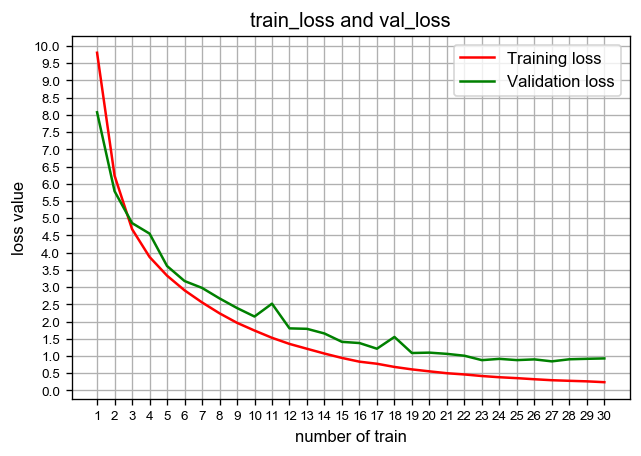   

In [25]:
#请在这列写代码







### 2.10 绘制精度值在训练集和测试集上的结果

```
plt.clf() #清空图像
acc = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.figure(dpi=120)
```
调用clf函数清空之前plt对象的图像信息，从history获取记录信息，分别获取acc（对应训练集上的精度值）、val_acc（对应验证集上的精度值）。
```
plt.plot(epochs, acc,  'b', label='Training loss',color='r') 
plt.plot(epochs, val_acc, 'b', label='Validation loss',color='g') 
plt.title('train acc and val acc')

plt.xticks([x for x in range(1,31)],fontsize=8)
plt.xlabel('train of number')
plt.ylabel('acc')
plt.grid()
plt.legend()
plt.show()
```
使用plot函数，epochs作为x轴数据，acc、val_acc分别作为y轴数据绘制两条颜色不一样的折线，添加图表标题，x轴、y轴标题以及图例。注：如果对matplotlib绘图有疑问请参看数据可视化实验了解学习。
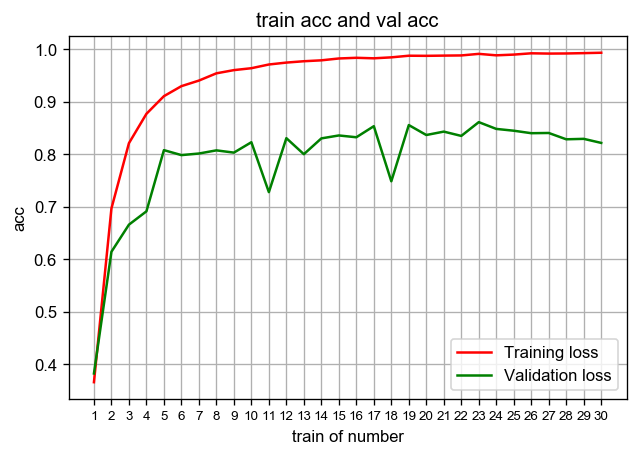   


In [26]:
#请在这列写代码







### 2.11总结-根据可视化结果分析
从以上两幅图：训练损失值和验证损失值、训练精度值和验证精度值来看，在十几次训练之后就出现了过拟合现象，所谓过拟合现象通俗讲就是我们的模型在训练数据集上的精度值和损失值都表现越来越好，而在验证集或者测试集上表现的越来越差，导致过拟合的原因有很多，有可能是特征维度过多，模型假设过于复杂，参数过多，训练数据过少，噪声过多等等，导致拟合的函数完美的预测训练集，但对新数据的测试集预测结果差。 过度的拟合了训练数据，而没有考虑到泛化能力。我们后续的任务就是要提高泛化能力，让我们的模型能更好的预测训练集以外的数据。  
本次实验在可视化训练过程知识的基础上，增加了设置检查点，以验证集上的损失值、精度值为标准保存当前最优参数模型。非常高效的保留了我们的最优模型，在日常开发中是必不可少的一步，希望同学们学以致用。

## 三、总结
<此处可填写你实验过程中遇到的问题、解决过程以及实验结果> 
